## GDR for scATAC-seq data

GDR demonstrates strong performance not only with scRNA-seq data but also with scATAC-seq data. Despite scATAC-seq data being characteristically sparse and containing significantly more features than scRNA-seq, GDR effectively manages these challenges. This notebook illustrates how GDR can be successfully applied to scATAC-seq datasets.

In [1]:
import scanpy as sc
import os
import logging
from matplotlib import rcParams
import time
import warnings

In [2]:
import sys
path = '/home/vas744/Analysis/Python/Packages/PIASO'
sys.path.append(path)
path = '/home/vas744/Analysis/Python/Packages/COSG'
sys.path.append(path)
import piaso

/home/vas744/.local/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
sc.set_figure_params(dpi=80,dpi_save=300, color_map='viridis',facecolor='white')
rcParams['figure.figsize'] = 5, 5
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "Arial"
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.10.3 anndata==0.10.8 umap==0.5.7 numpy==1.26.4 scipy==1.13.0 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.5 louvain==0.8.2 pynndescent==0.5.13


### Load the data

The scATAC-seq data being used for this tutorial can be download from here: https://drive.google.com/file/d/1lJYqU2ZbTP2knLDqUFRtALCmercWqQRE/view?usp=drive_link

In [5]:
!/home/vas744/Software/gdrive files download --overwrite --destination /n/scratch/users/v/vas744/Data/Public/PIASO 1lJYqU2ZbTP2knLDqUFRtALCmercWqQRE

Successfully downloaded Zemke_2023_mouse_normalized.h5ad


In [6]:
adata_path = os.path.join("/n/scratch/users/v/vas744/Data/Public/PIASO", "Zemke_2023_mouse_normalized.h5ad")

In [7]:
adata = sc.read(
    adata_path,
)
adata

AnnData object with n_obs × n_vars = 45089 × 330448
    obs: 'sample', 'cell_annotation'
    layers: 'raw'

In [8]:
adata.layers['log1p'] = adata.X.copy()

### GDR with batch information, no cell type information

In [9]:
start_time = time.time()
piaso.tl.runGDRParallel(adata,
                        batch_key='sample',
                        groupby=None,
                        n_gene=200,
                        mu=10,
                        use_highly_variable=False,
                        n_highly_variable_genes=5000,
                        layer='log1p',
                        score_layer='log1p',
                        n_svd_dims=50,
                        resolution=3.0,
                        scoring_method=None,
                        key_added='X_gdr_1',
                        max_workers = 4,
                        verbosity=0)
end_time = time.time()
parallel_time = end_time - start_time

print("Time required to run parallel runGDR: ", parallel_time)

Calculating cell embeddings: 100%|██████████| 8/8 [52:34<00:00, 394.30s/batch]

The cell embeddings calculated by GDR were saved as `X_gdr_1` in adata.obsm.
Time required to run parallel runGDR:  3756.714690923691


#### Visualize GDR results

In [15]:
%%time
sc.pp.neighbors(adata,
                use_rep='X_gdr_1',
                n_neighbors=15,
                random_state=10,
                knn=True,
                method="umap")
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:00)
CPU times: user 1min 49s, sys: 1.31 s, total: 1min 50s
Wall time: 1min 11s


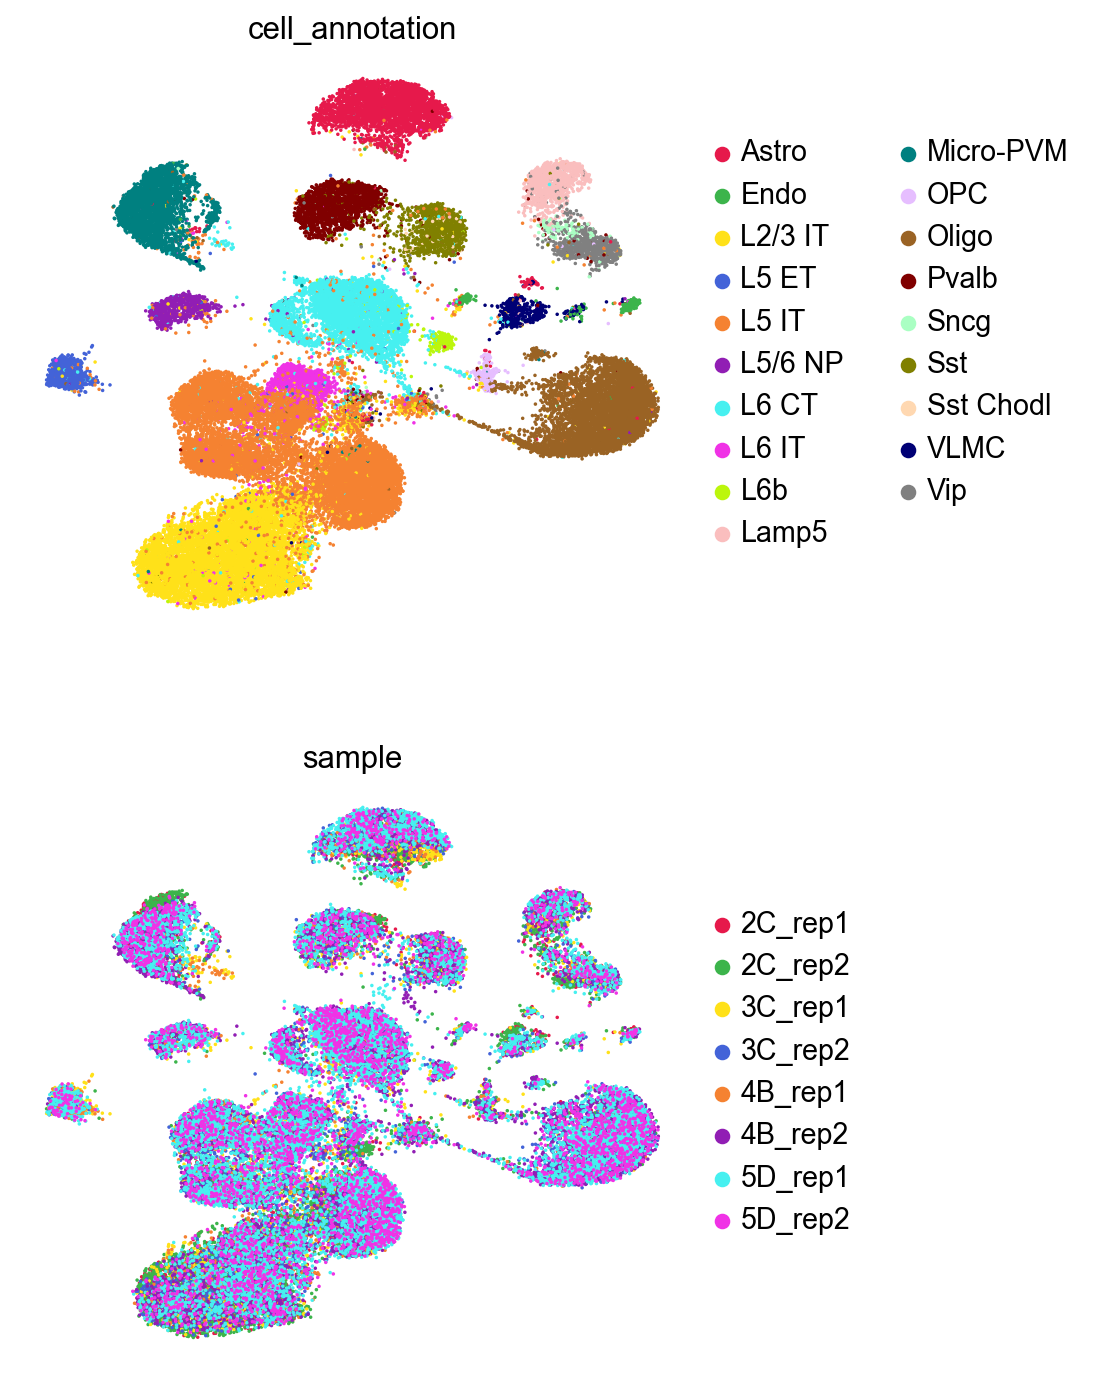

In [16]:
sc.pl.umap(adata,
           color=['cell_annotation','sample'],
           palette=piaso.pl.color.d_color4,
           cmap=piaso.pl.color.c_color4,
           size=10,
           ncols=1,
           frameon=False)

### GDR with no batch information, no cell type information

In [12]:
start_time = time.time()
piaso.tl.runGDRParallel(adata,
                        batch_key=None,
                        groupby=None,
                        n_gene=200,
                        mu=10,
                        use_highly_variable=False,
                        n_highly_variable_genes=5000,
                        layer='log1p',
                        score_layer='log1p',
                        n_svd_dims=50,
                        resolution=3.0,
                        scoring_method=None,
                        key_added='X_gdr_2',
                        max_workers = 4,
                        verbosity=0)
end_time = time.time()
parallel_time = end_time - start_time

print("Time required to run parallel runGDR: ", parallel_time)

The cell embeddings calculated by GDR were saved as `X_gdr_2` in adata.obsm.
Time required to run parallel runGDR:  1945.1909103393555


#### Visualize GDR results

In [17]:
%%time
sc.pp.neighbors(adata,
                use_rep='X_gdr_2',
                n_neighbors=15,
                random_state=10,
                knn=True,
                method="umap")
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:18)
CPU times: user 7min 56s, sys: 1.62 s, total: 7min 57s
Wall time: 1min 27s


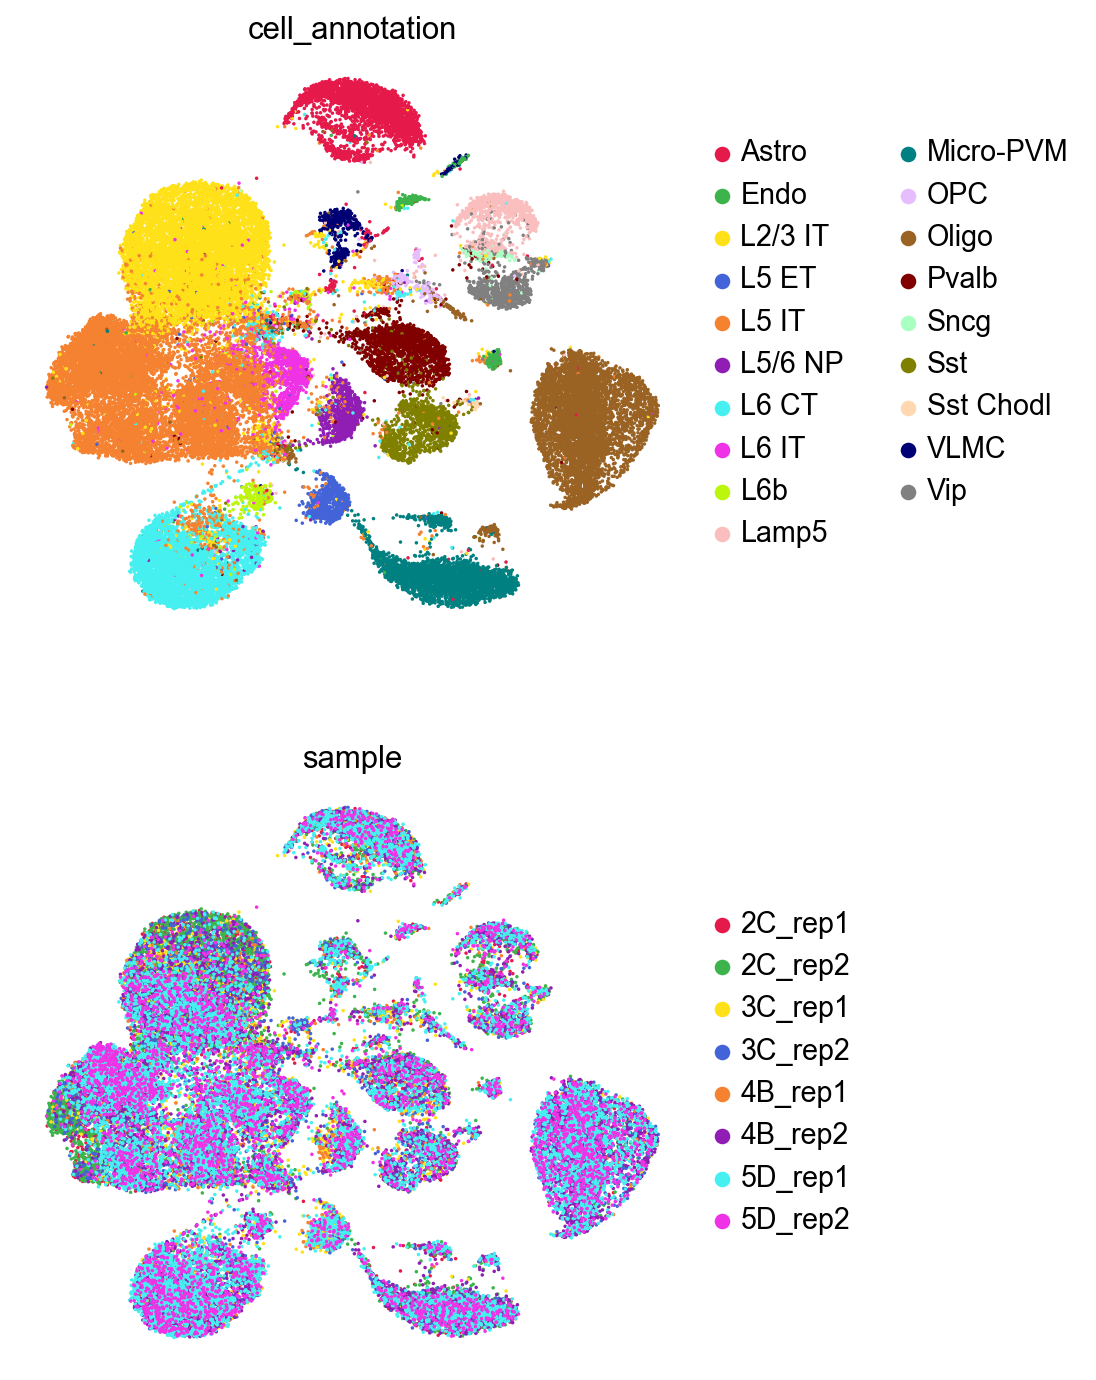

In [18]:
sc.pl.umap(adata,
           color=['cell_annotation','sample'],
           palette=piaso.pl.color.d_color4,
           cmap=piaso.pl.color.c_color4,
           size=10,
           ncols=1,
           frameon=False)